In [10]:
import numpy as np
import matplotlib.pyplot as plt

# import scipy numerical integration
from scipy.integrate import odeint
np.seterr(all='print')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [66]:
# write equations 
p2, p3, p4, p5, p6 = 15, 7.2, 0.05, 0.11, 2.9

stepsize = 0.0008

tau = int(1.5/stepsize)


def drdt(r, o, a):
    return (o*r)**2 / (p4+(o*r)**2) + p5 - p6*r

def dodt(r, o, a_array):
    return a_array[-tau] - o

def dadt(r, o, a_array, p1):
    return p1/(1+p2*r*o) - p3*a_array[-1]

N_steps = int(138.6294/2 / stepsize + 1)


time_array = np.arange(0, N_steps*stepsize, stepsize)

initial_r = 0.1
initial_o = 0.1
a_array = np.zeros(tau+1)


def step(r, o, a_array, p1):
    rr = r + drdt(r, o, a_array) * stepsize
    oo = o + dodt(r, o, a_array) * stepsize
    a = a_array[-1] + dadt(r, o, a_array, p1) * stepsize
    a_array = np.append(a_array, a)
    return rr, oo, a_array

r, o = initial_r, initial_o

rs = []
os = []

p1 = np.array(26 + np.sin(2*np.pi/138.6294*time_array))

for i in range(N_steps):
    r, o, a_array = step(r, o, a_array, p1[i])
    # if there are nans
    if np.isnan(r) or np.isnan(o) or np.isnan(a_array[-1]):
        print("nan")
        print(i)
        print(r, o, a_array[-1],a_array[-3], a_array[-4])
        break
    rs.append(r)
    os.append(o)


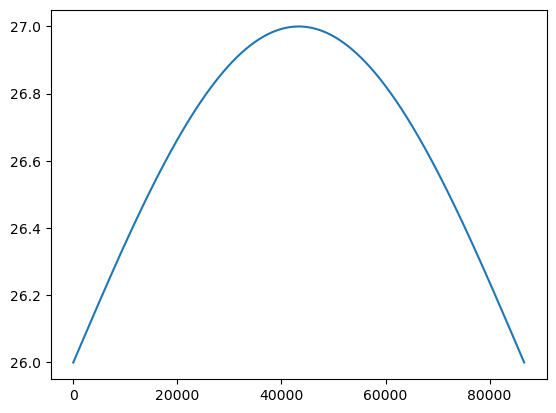

In [62]:
plt.plot(p1)

In [58]:
rs[-10]

np.float64(0.08203916692787341)

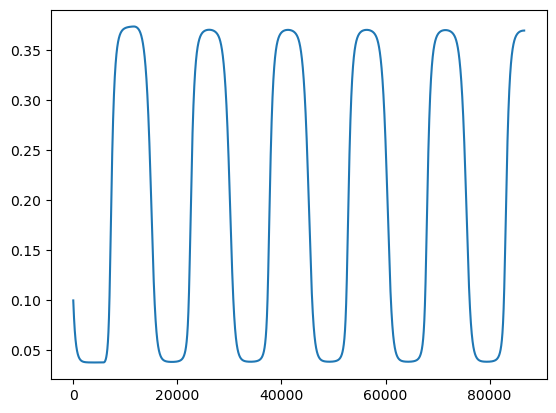

In [63]:
plt.plot(rs)
# plt.plot(os)

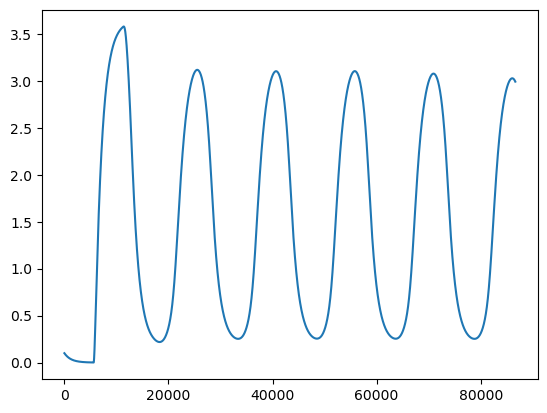

In [64]:
plt.plot(os)

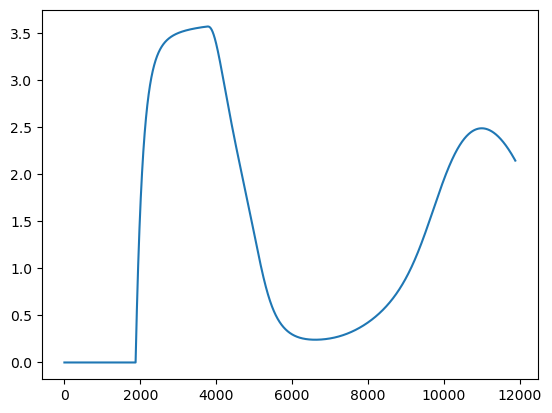

In [40]:
plt.plot(a_array)